In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
data = pd.read_csv('/Users/lisahuiseva/Desktop/system-prompt-leak-detection/data_reshaped.csv')
data.head()

,rouge,levenshtein,jaccard,cosine,label
0,0.430108,0.515571,0.222222,0.701965,1
1,0.353591,0.653516,0.177966,0.728546,1
2,0.414508,0.577855,0.233333,0.788009,1
3,0.378378,0.671280,0.183333,0.842536,1
4,0.429379,0.638408,0.231481,0.863292,1


In [33]:
len(data)

929

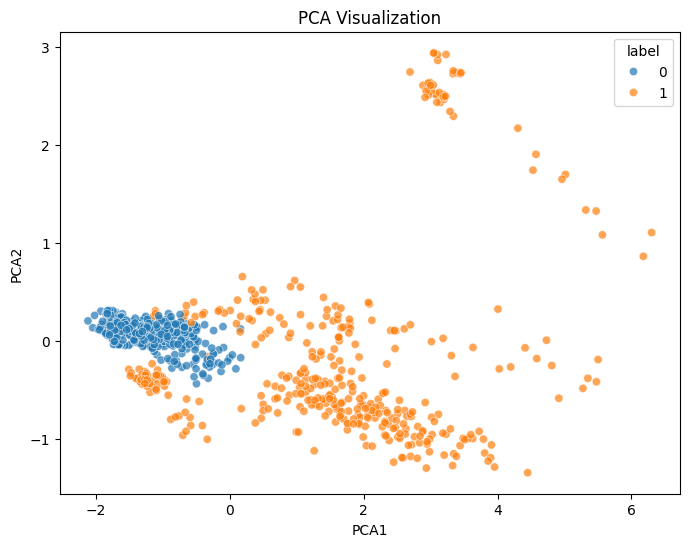

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['rouge', 'levenshtein', 'jaccard', 'cosine']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a PCA DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['label'] = data['label']

# Scatterplot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='label', alpha=0.7)
plt.title('PCA Visualization')
plt.show()

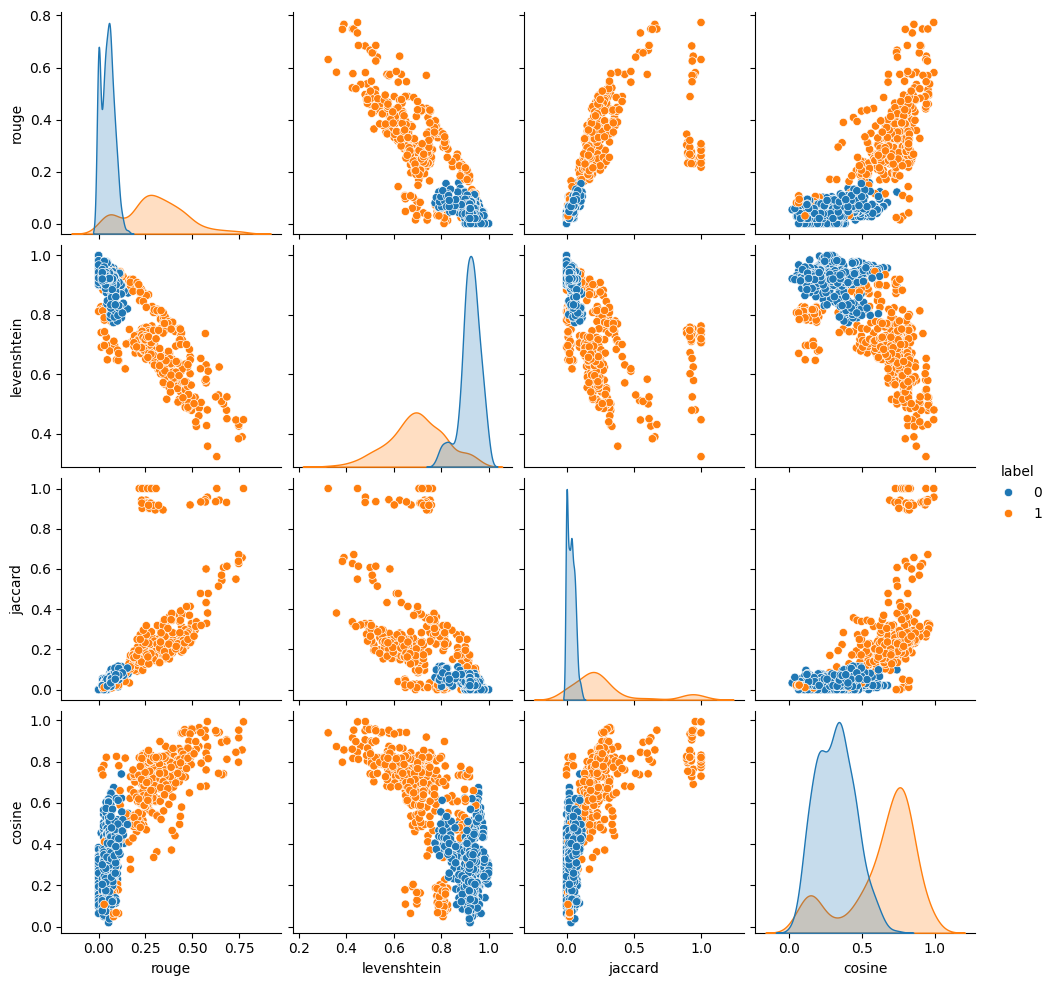

In [32]:
sns.pairplot(data, hue='label', vars=['rouge', 'levenshtein', 'jaccard', 'cosine'])
plt.show()

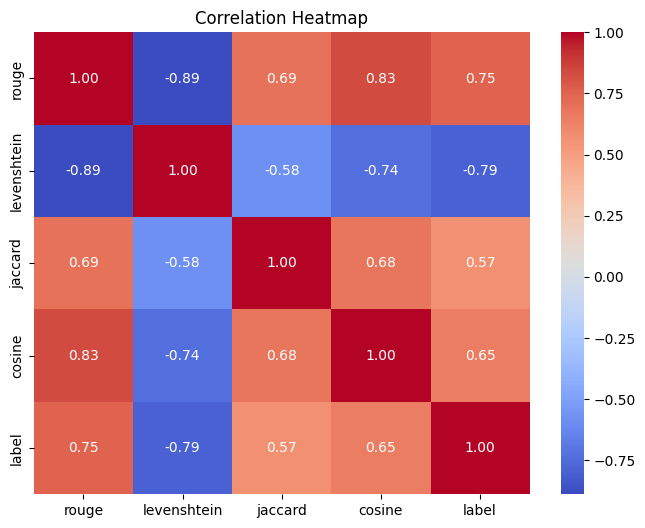

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
correlation_matrix = data[['rouge', 'levenshtein', 'jaccard', 'cosine', 'label']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()